<h1> Analysis of Datasets </h1>
<h2> Using Logistic Regression and Naive Bayes </h2>

<h2>Dataset 4: Adult Census</h2>

Dataset obtained from: https://archive.ics.uci.edu/ml/datasets/adult


Approach:  We first prepare the dataset to train both the models. We then train the model and compare the performance of both the algorithms. 

<h2> Section 1: Preparing the Data </h2>
<h3> Loading the dataset </h3>


    

In [197]:
#loading the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


path = 'adult.data'
headerData = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation",
              "relationship","race", "sex" , "capital-gain" , "capital-loss", "hours-per-week", 
              "native-country", "income"]
rawFileData = pd.read_csv(path, names = headerData)

<h3> Data Overview </h3>
Lets overview our dataset by displaying the top five records


In [198]:
#oveview dataset
rawFileData.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [199]:
#oveview dataset
dim = rawFileData.shape
rows = dim[0]
cols = dim[1]

print("There are a total of " + str(rows) + " rows and " + str(cols) + " columns in our dataset.")

There are a total of 32561 rows and 15 columns in our dataset.


<h3> Displaying basic statisics about the data </h3>

In [200]:
rawFileData.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Looks like the cols capital-gain and capital-loss have mostly zero values so we decide to drop it

In [201]:
rawFileData.drop("capital-gain", axis=1, inplace=True,)
rawFileData.drop("capital-loss", axis=1, inplace=True,)

<h3>Cleaning the data by removing rows with missing values</h3>

In [202]:
#removing rows with missing values
rawFileData = rawFileData[(rawFileData.values != ' ?').all(axis=1)]

<h3> Distribution of some features </h3>

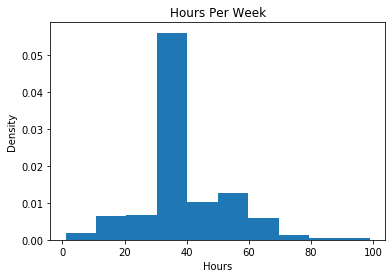

In [203]:
x= rawFileData['hours-per-week']
plt.hist(x,bins=None,density=True,normed=None,histtype='bar')
plt.title('Hours Per Week')
plt.xlabel('Hours')
plt.ylabel('Density')
plt.show()

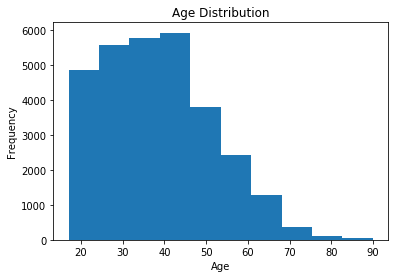

In [204]:
x= rawFileData['age']
plt.hist(x,bins=None,normed=None,histtype='bar')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

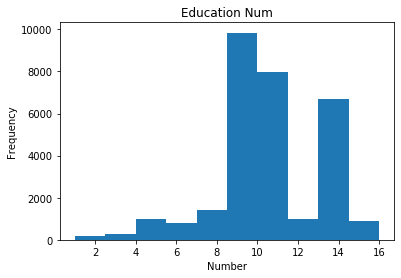

In [205]:
x= rawFileData['education-num']
plt.hist(x,bins=None,normed=None,histtype='bar')
plt.title('Education Num')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()

<h3>Hot encoding the categorical columns</h3>

In [206]:
#hot encoding categorical data

hotEncodedData = pd.concat([rawFileData,pd.get_dummies(rawFileData['race'], prefix='race')],axis=1)
hotEncodedData.drop(['race'],axis=1, inplace=True)

hotEncodedData = pd.concat([hotEncodedData,pd.get_dummies(hotEncodedData['education'], prefix='education')],axis=1)
hotEncodedData.drop(['education'],axis=1, inplace=True)

hotEncodedData = pd.concat([hotEncodedData,pd.get_dummies(hotEncodedData['workclass'], prefix='workclass')],axis=1)
hotEncodedData.drop(['workclass'],axis=1, inplace=True)

hotEncodedData = pd.concat([hotEncodedData,pd.get_dummies(hotEncodedData['marital-status'], prefix='marital-status')],axis=1)
hotEncodedData.drop(['marital-status'],axis=1, inplace=True)

hotEncodedData = pd.concat([hotEncodedData,pd.get_dummies(hotEncodedData['occupation'], prefix='occupation')],axis=1)
hotEncodedData.drop(['occupation'],axis=1, inplace=True)

hotEncodedData = pd.concat([hotEncodedData,pd.get_dummies(hotEncodedData['relationship'], prefix='relationship')],axis=1)
hotEncodedData.drop(['relationship'],axis=1, inplace=True)

hotEncodedData = pd.concat([hotEncodedData,pd.get_dummies(hotEncodedData['sex'], prefix='sex')],axis=1)
hotEncodedData.drop(['sex'],axis=1, inplace=True)

hotEncodedData = pd.concat([hotEncodedData,pd.get_dummies(hotEncodedData['native-country'], prefix='native-country')],axis=1)
hotEncodedData.drop(['native-country'],axis=1, inplace=True)

In [207]:
hotEncodedData

,age,fnlwgt,education-num,hours-per-week,income,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,40,<=50K,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,13,<=50K,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,40,<=50K,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,40,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,40,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,38,<=50K,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,40,>50K,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,40,<=50K,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,20,<=50K,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


<h3> Mapping the labels to numerical values </h3>

We map "<=50K" to 0
and ">50K" to 1

In [208]:
numDataSet = hotEncodedData.replace({"<=50K": "0"}, regex=True)

In [209]:
numDataSet = numDataSet.replace({">50K": '1'}, regex=True)

<h3> Extracting the labels </h3>

In [210]:
Y = numDataSet['income']

In [211]:
#converting to numpy array
labels = Y.to_numpy()

In [212]:
#removing the labels column from the dataset
numDataSet.drop(['income'],axis=1, inplace=True)

<h3> Saving the Processed data <h3>

In [213]:
X_data = numDataSet.to_numpy()

<h3> Converting all values into floats </h3>
For computation in numpy

In [214]:
#string to float
Y_labels = labels.astype(np.float)
X = X_data.astype(np.float)

<h2> Section 2: Implementing the Models </h2>

The models have been implemented in a separate file. 
We import these modules to work with them.

In [215]:
#importing the implementation for the algorithms
import L_Regression
import N_Bayes


#making a class instance
logistic = L_Regression.LogisticRegression()
naive = N_Bayes.NaiveBayes()

<h2> Section 3: Running Experiments </h2>

We run the experiments stated in the project requirements.

<h2> EXPERIMENT 1: Compare the accuracy of naive Bayes and logistic regression </h2>

<h3> Fitting the models </h3>


In [225]:
AccuracyTrace = logistic.fit(X_data,Y_labels)
naive.fit(X_data, Y_labels)

<h3> Accuracy of Logistic Regression </h3>

In [223]:
logistic.evaluate_acc(Y_labels, logistic.predict(X_data))

0.7510775147536636

Hence, our Logistic Regression model has an accuracy of 75.11% on this dataset.

<h3> Accuracy of Naive Bayes </h3>

In [218]:
naive.evaluate_acc(Y_labels, naive.predict(X_data))

0.7715337179232147

Hence, our Naive Bayes model has an accuracy of 77.15% on this dataset.

Experiment 1 concludes that Logistic Regression is more accurate than Naive Bayes for this dataset.

<h2> EXPERIMENT 2: Test different learning rates for gradient descent applied to logistic regression </h2>


<h4> 1. Learning Rate vs Accuracy </h4>

In [219]:
learning_rates = [0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10]

In [220]:
accuracy = []
for rates in learning_rates:
    accuracy.append(logistic.fit(X_data, Y_labels, rates).pop())
table1 = pd.DataFrame({'Learning Rate' : learning_rates, 'Final Accuracy' : accuracy})

In [221]:
table1

,Learning Rate,Final Accuracy
0,0.00001,0.751078
1,0.00010,0.751078
2,0.00100,0.751078
3,0.01000,0.751078
4,0.10000,0.751078
5,1.00000,0.751078
6,10.00000,0.751078


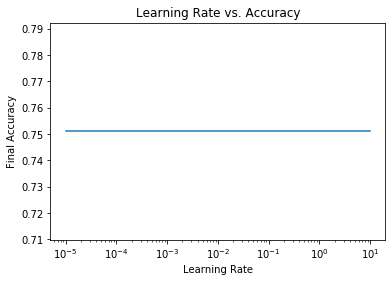

In [222]:
plt.xlabel('Learning Rate') 
plt.ylabel('Final Accuracy') 
plt.title('Learning Rate vs. Accuracy') 
plt.plot(learning_rates, accuracy)
plt.xscale("log")
plt.show()

<h4> 2. Number of Iterations vs Accuracy </h4>

In [226]:
count=0
Iteration = []
for i in AccuracyTrace:
    count = count + 1
    Iteration.append(count)

In [227]:
table2 = pd.DataFrame({'Iteration' : Iteration, 'Accuracy' : AccuracyTrace})

In [228]:
table2

,Iteration,Accuracy
0,1,0.751078
1,2,0.248922
2,3,0.751078
3,4,0.751078
4,5,0.248922
...,...,...
495,496,0.751078
496,497,0.751078
497,498,0.248922
498,499,0.751078


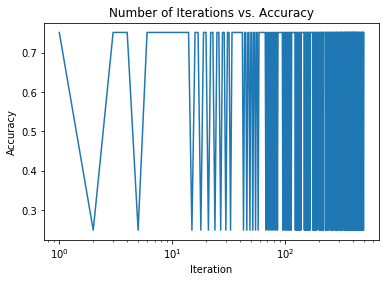

In [232]:
plt.xlabel('Iteration') 
plt.ylabel('Accuracy') 
plt.title('Number of Iterations vs. Accuracy') 
plt.plot(Iteration, AccuracyTrace)
plt.xscale("log")
plt.show()

<h2> EXPERIMENT 3: Compare the accuracy of the two models as a function of the size of dataset </h2>


<h3> 1. Logistic Regression </h3>

In [263]:
percentageTrainingSize = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
dataSize = []
percentages = []
for per in percentageTrainingSize:
    dataSize.append(per*X_data.shape[0])
    percentages.append(str(per*100)+"%")

In [257]:
dataSize = [int(i) for i in dataSize]

In [260]:
Acc = []
for size in dataSize:
    Acc.append(logistic.fit(X_data[1:size], Y_labels[1:size]).pop())

In [264]:
table3 = pd.DataFrame({'Dataset Size (%)' : percentages, 'Accuracy' : Acc})

In [265]:
table3

,Dataset Size (%),Accuracy
0,20.0%,0.749959
1,30.0%,0.755057
2,40.0%,0.753461
3,50.0%,0.752785
4,60.0%,0.753702
5,70.0%,0.753552
6,80.0%,0.752362
7,90.0%,0.248268
8,100%,0.751069


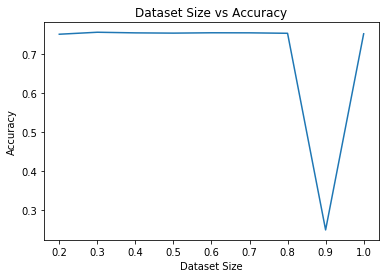

In [267]:
plt.xlabel('Dataset Size') 
plt.ylabel('Accuracy') 
plt.title('Dataset Size vs Accuracy') 
plt.plot(percentageTrainingSize, Acc)
plt.show()

<h3> 2. Naive Bayes </h3>

In [268]:
Acc2 = []
for size in dataSize:
    Acc2.append(naive.evaluate_acc(Y_labels[1:size], naive.predict(X_data[1:size])))

In [269]:
table4 = pd.DataFrame({'Dataset Size (%)' : percentages, 'Accuracy' : Acc2})

In [270]:
table4

,Dataset Size (%),Accuracy
0,20.0%,0.773504
1,30.0%,0.774400
2,40.0%,0.771533
3,50.0%,0.770557
4,60.0%,0.769839
5,70.0%,0.769704
6,80.0%,0.771262
7,90.0%,0.772325
8,100%,0.771526


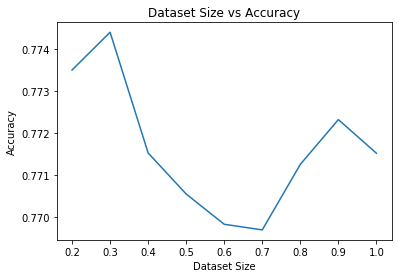

In [271]:
plt.xlabel('Dataset Size') 
plt.ylabel('Accuracy') 
plt.title('Dataset Size vs Accuracy') 
plt.plot(percentageTrainingSize, Acc2)
plt.show()